# HW1
Neural Network

# Mahdi Firuzbakht
400131027

In [18]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

# Question 1

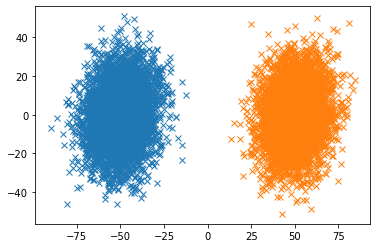

In [2]:
mean = [-50, 0]
cov = [[100, 20], [20, 200]]

x1, y1 = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x1, y1, 'x')

z1 = np.zeros(len(x1), dtype=int)

data = list()
for i in range(len(x1)):
    data.append((x1[i] , y1[i] , z1[i]))

mean = [50, 0]
cov = [[100, 20], [20, 200]]

x2, y2 = np.random.multivariate_normal(mean, cov, 5000).T
plt.plot(x2, y2, 'x')

z2 = np.ones(len(x2), dtype=int)

for i in range(len(x2)):
    data.append((x2[i] , y2[i] , z2[i]))
    
data = np.array(data)

plt.show()

In [3]:
X = data[:,0:2]
Y = data[:,2]
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.3, random_state=123)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size=0.33333333, random_state=123)

# Question 2

In [4]:
class Perceptron:
    def __init__(self, learning_rate=0.01, n_iters=10 ,activation_func = "sig" ):
        self.lr = learning_rate
        self.n_iters = n_iters
        if activation_func == "sig":
            self.activation_func = self.sig
        elif activation_func == "tanh":
            self.activation_func = self.tanh
        elif activation_func == "unit":
            self.activation_func = self._unit_step_func
            
        self.weights = None
        self.bias = None

    def fit(self, X, y , X_valid , y_valid):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features) + 1
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])
        self.errors_ = []
        self.validation_errors = []

        for _ in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):

                linear_output = np.dot(x_i, self.weights) + self.bias
                y_predicted = self.activation_func(linear_output)

                # Perceptron update rule
                update = self.lr * (y_[idx] - y_predicted)

                self.weights += update * x_i
                self.bias += update
                errors += int(update != 0)
            self.errors_.append(errors)
            valid_errors = 0
            y_pred_valid = self.predict(X_valid)
            for i in range(len(y_pred_valid)):
                if y_pred_valid[i] != y_valid[i]:
                    valid_errors += 1
            self.validation_errors.append(valid_errors)
            

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)
    
    def sig(self , x):
        return 1/(1 + np.exp(-x))
    
    def tanh(self , x):
        return np.tanh(x)
    
    def accuracy(self , y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

In [5]:
class Adaline:
    def __init__(self, learning_rate=0.01, n_iters=10 ,activation_func = "sig" ):
        self.lr = learning_rate
        self.n_iters = n_iters
        if activation_func == "sig":
            self.activation_func = self.sig
        elif activation_func == "tanh":
            self.activation_func = self.tanh
        elif activation_func == "unit":
            self.activation_func = self._unit_step_func
            
        self.weights = None
        self.bias = None
        self.cost_ = list()

    def fit(self, X, y , X_valid , y_valid):
        n_samples, n_features = X.shape

        # init parameters
        self.weights = np.zeros(n_features)
        self.bias = 0

        y_ = np.array([1 if i > 0 else 0 for i in y])
        self.errors_ = []
        self.validation_errors = []
        
        for _ in range(self.n_iters):
            errors = 0
            for idx, x_i in enumerate(X):
                activation = self.bias
                for i in range(len(x_i)):
                    activation += self.weights[i] * x_i[i]
                error = y[idx] - activation
                
                
                self.bias = self.bias + self.lr * error
                prediction = self.predict(x_i)
                if (y[idx]-prediction) != 0:
                    errors += 1
                    for i in range(len(x_i)):
                        self.weights[i] = self.weights[i] + self.lr * error * x_i[i]
                        
            
            self.errors_.append(errors)
            
            valid_errors = 0
            for id_item, item in enumerate(X_valid):
                prediction = self.predict(item)
                if (y_valid[id_item] - prediction) != 0:
                    valid_errors += 1
            self.validation_errors.append(valid_errors)
    
    def net_input(self, X):
        return np.dot(X, self.weights) + self.bias

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        y_predicted = self.activation_func(linear_output)
        return y_predicted

    def _unit_step_func(self, x):
        return np.where(x >= 0, 1, 0)
    
    def sig(self , x):
        return 1/(1 + np.exp(-x))
    
    def tanh(self , x):
        return np.tanh(x)
    
    def accuracy(self , y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

# Question 3

In [9]:
#firstOrder
def firstOrder(Type , learning_rate , n_iters , activation_func):
    
    ppn = Type(learning_rate=learning_rate, n_iters=n_iters ,activation_func = activation_func)
    ppn.fit(X_train, y_train , X_valid, y_valid)
    pred_test = ppn.predict(X_test)

    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')

    plt.plot(range(1, len(ppn.validation_errors) + 1), ppn.validation_errors,marker='o' , color = "red")

    plt.title(Type.__name__+" with learning rate "+str(learning_rate)+" " + activation_func +" Activation Function" )
    plt.xlabel('Epochs')
    plt.ylabel('Number of errors')
    acc = ppn.accuracy(y_test , pred_test)
    text = "Accuracy of test dataset is : " +str(acc)
    plt.show()

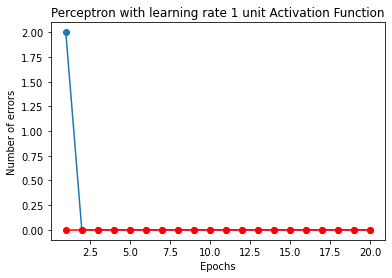

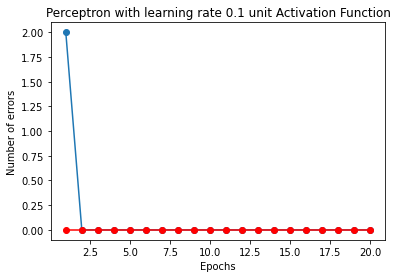

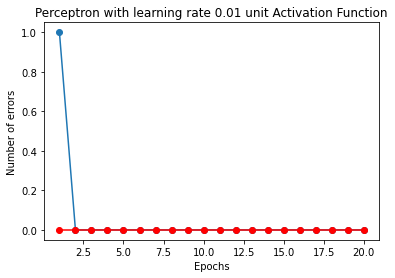

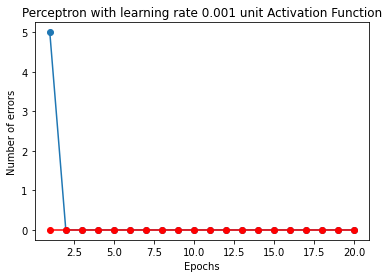

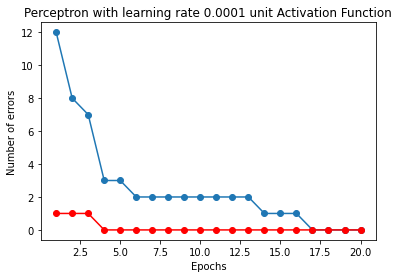

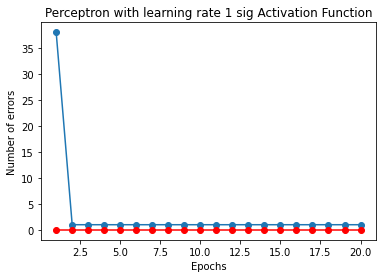

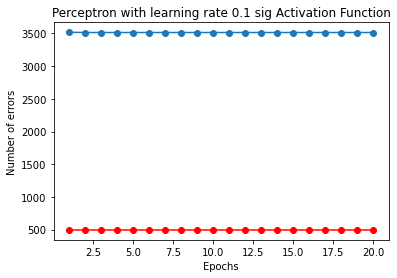

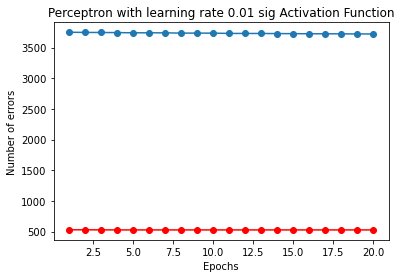

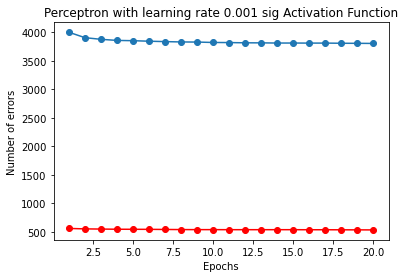

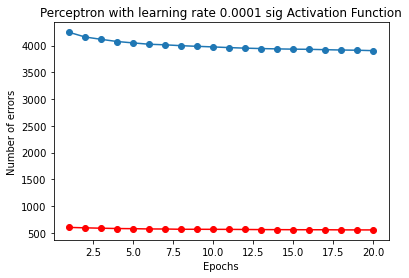

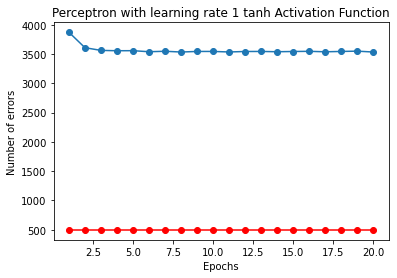

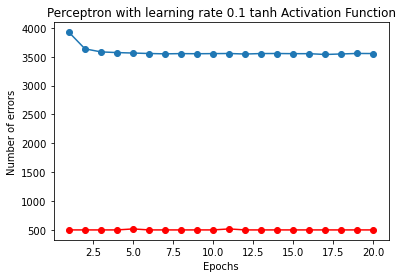

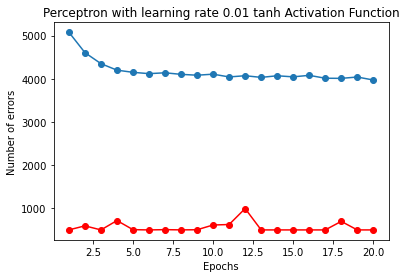

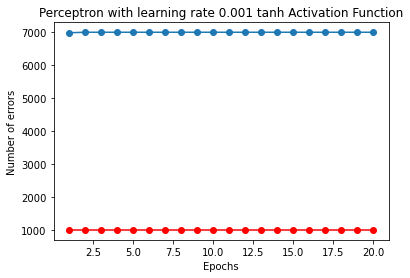

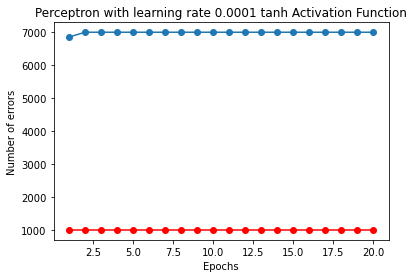

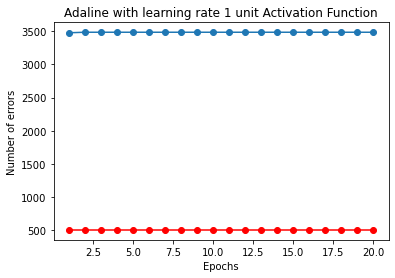

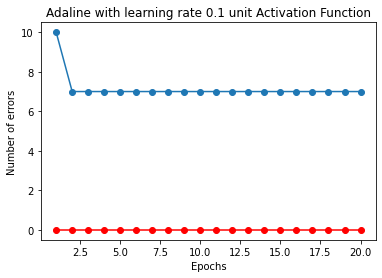

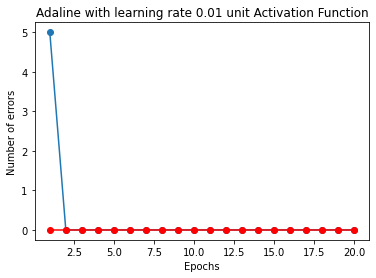

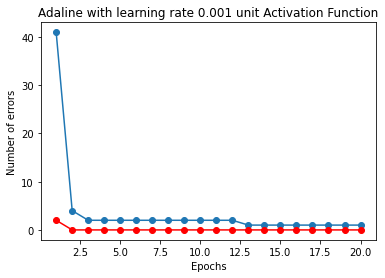

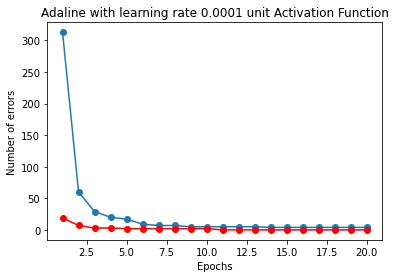

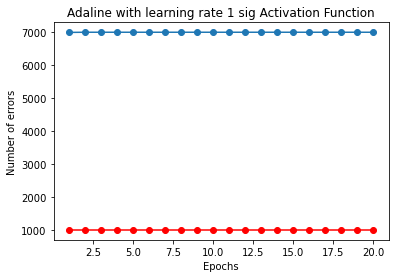

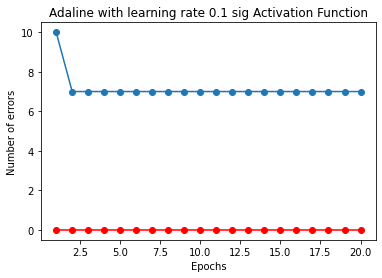

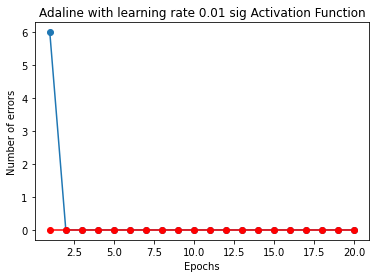

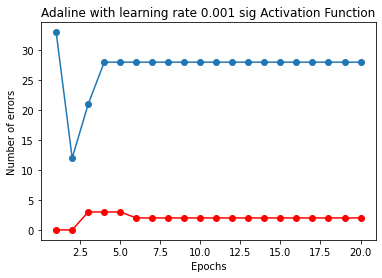

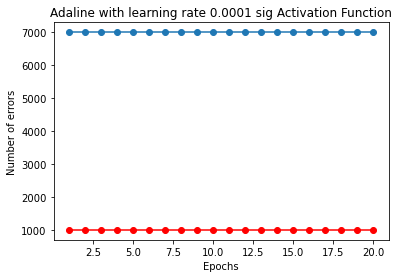

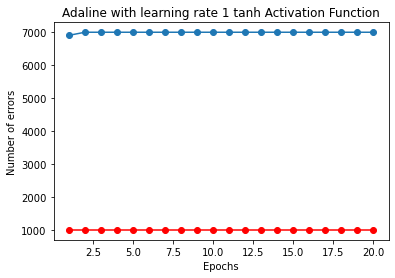

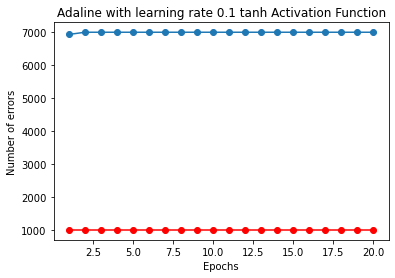

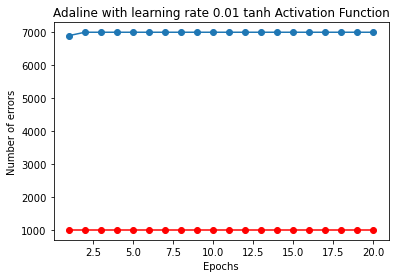

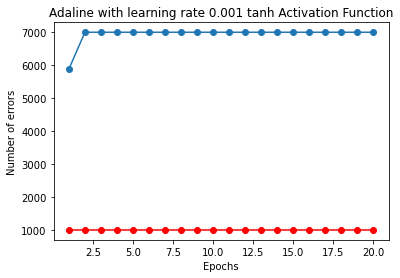

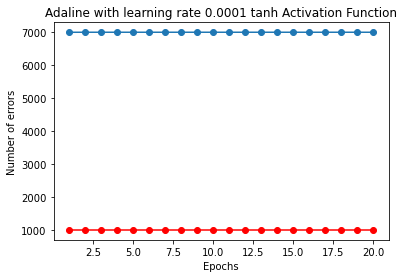

In [10]:
rates = [1 , 0.1 , 0.01 , 0.001 , 0.0001]
acts = ["unit" , "sig" , "tanh"]
types = [Perceptron , Adaline]
for Type in types:
    for act in acts:
        for rate in rates:
            firstOrder(Type,rate , 20 , act)

# Question 4

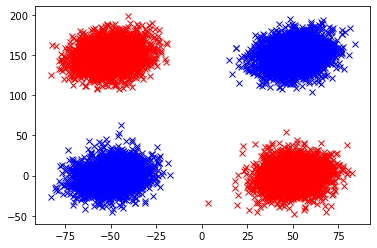

In [11]:
mean = [-50, 150]
cov = [[100, 20], [20, 200]]

x1, y1 = np.random.multivariate_normal(mean, cov, 2500).T
plt.plot(x1, y1, 'x' , color='red')

z1 = np.zeros(len(x1), dtype=int)

data = list()
for i in range(len(x1)):
    data.append((x1[i] , y1[i] , z1[i]))
    
    
mean = [50, 150]
cov = [[100, 20], [20, 200]]

x2, y2 = np.random.multivariate_normal(mean, cov, 2500).T
plt.plot(x2, y2, 'x' , color='blue')

z2 = np.ones(len(x2), dtype=int)

for i in range(len(x2)):
    data.append((x2[i] , y2[i] , z2[i]))
    
    
mean = [50, 0]
cov = [[100, 20], [20, 200]]

x1, y1 = np.random.multivariate_normal(mean, cov, 2500).T
plt.plot(x1, y1, 'x' , color='red')

z1 = np.zeros(len(x1), dtype=int)

for i in range(len(x1)):
    data.append((x1[i] , y1[i] , z1[i]))    
    
    

mean = [-50, 0]
cov = [[100, 20], [20, 200]]

x2, y2 = np.random.multivariate_normal(mean, cov, 2500).T
plt.plot(x2, y2, 'x' , color='blue')

z2 = np.ones(len(x2), dtype=int)

for i in range(len(x2)):
    data.append((x2[i] , y2[i] , z2[i]))

    
data = np.array(data)

plt.show()

# Question 5

In [12]:
X = data[:,0:2]
Y = data[:,2]
X_train, X_rem, y_train, y_rem = train_test_split(X, Y, test_size=0.3, random_state=123)
X_test, X_valid, y_test, y_valid = train_test_split(X_rem, y_rem, test_size=0.33333333, random_state=123)

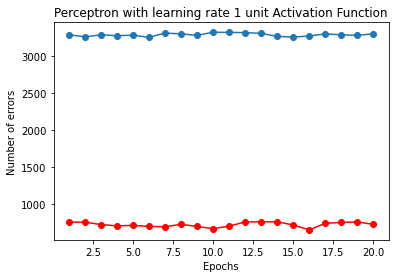

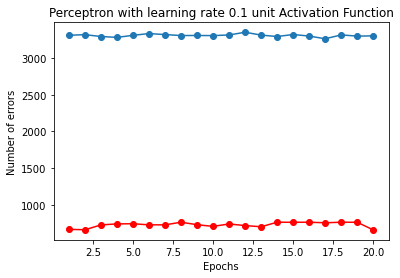

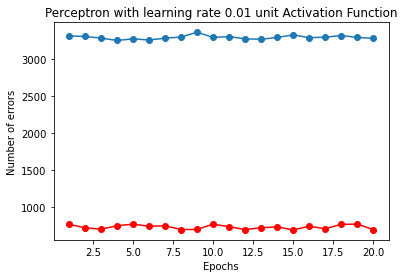

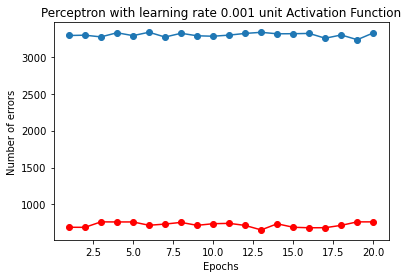

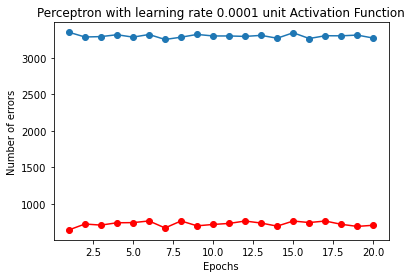

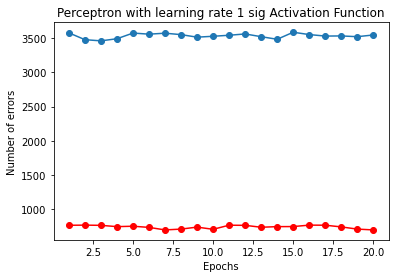

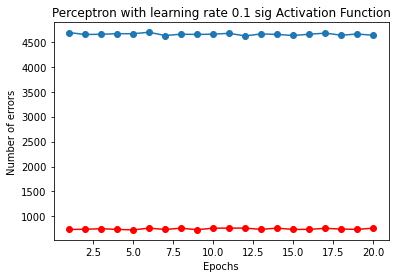

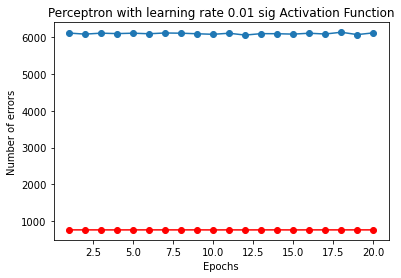

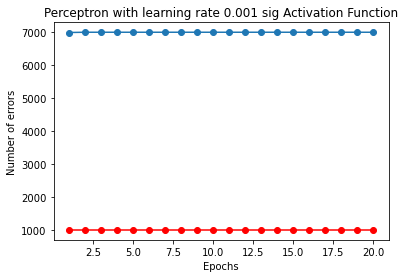

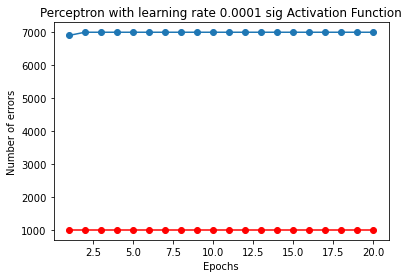

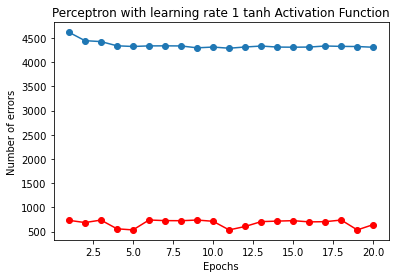

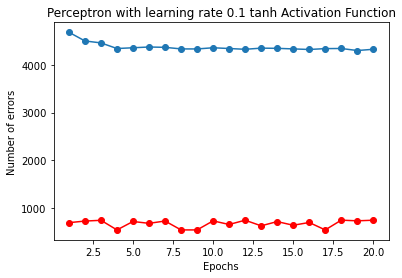

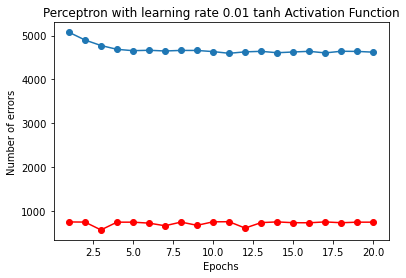

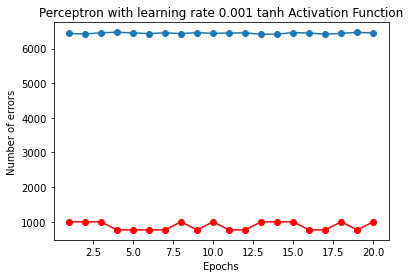

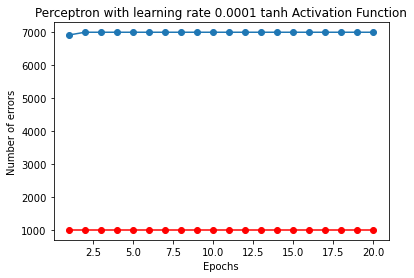

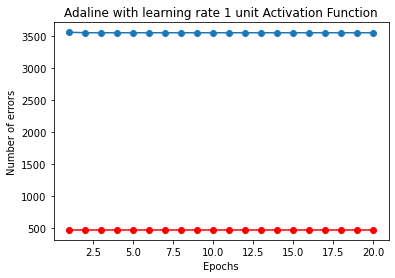

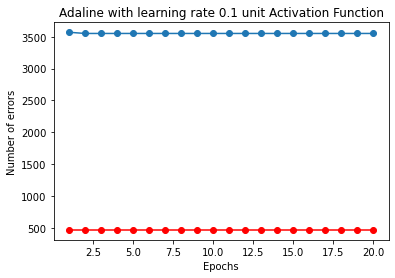

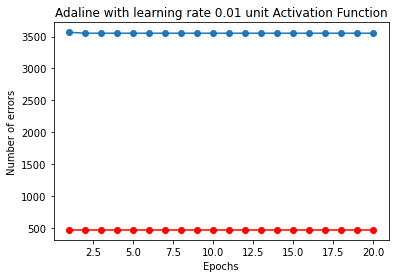

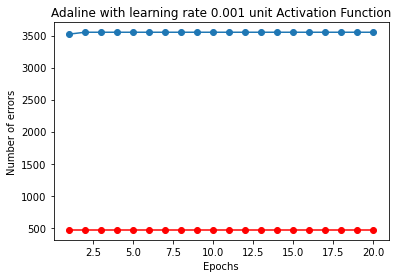

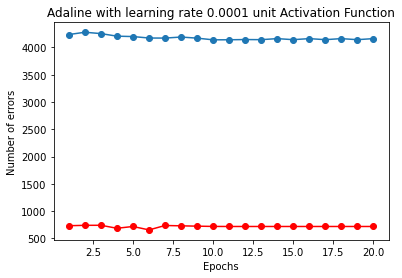

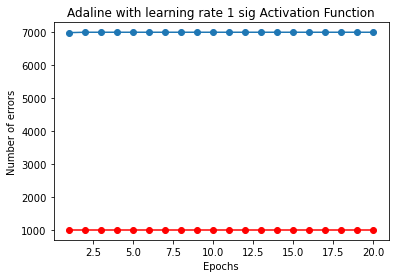

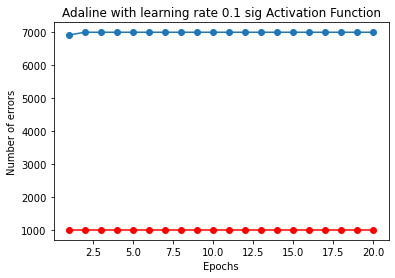

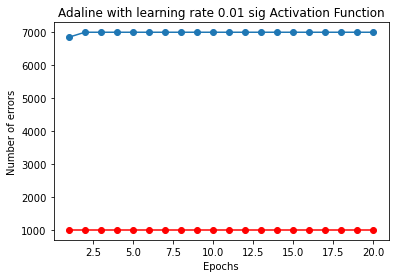

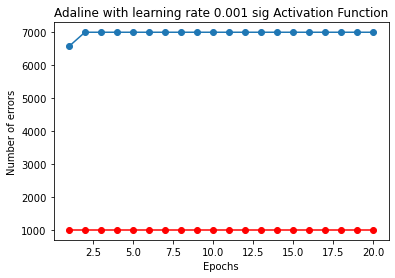

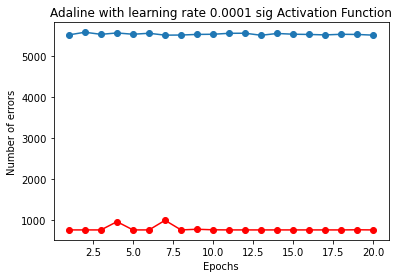

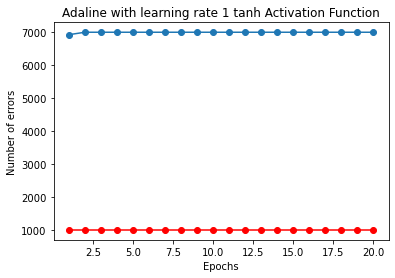

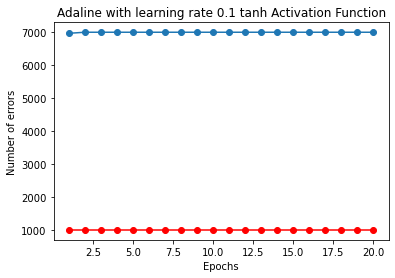

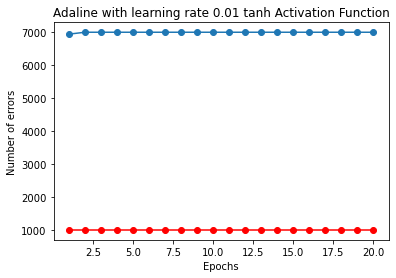

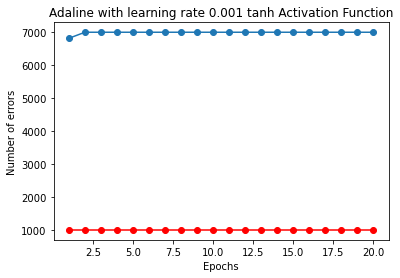

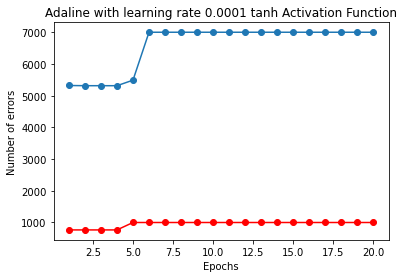

In [13]:
rates = [1 , 0.1 , 0.01 , 0.001 , 0.0001]
acts = ["unit" , "sig" , "tanh"]
types = [Perceptron , Adaline]
for Type in types:
    for act in acts:
        for rate in rates:
            firstOrder(Type,rate , 20 , act)

# Question 6

In [14]:
#second-order
def secondOrder(Type , learning_rate , n_iters , activation_func , idx):
    new_train_data = changeInput(X_train)
    new_test_data = changeInput(X_test)
    new_valid_data = changeInput(X_valid)
    
    ppn = Type(learning_rate=learning_rate, n_iters=n_iters ,activation_func = activation_func)
    ppn.fit(new_train_data, y_train , new_valid_data, y_valid)
    pred_test = ppn.predict(new_test_data)

    plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_,marker='o')

    plt.plot(range(1, len(ppn.validation_errors) + 1), ppn.validation_errors,marker='o' , color = "red")
    
    Title = Type.__name__+" with learning rate "+str(learning_rate)+" " + activation_func +" Activation Function" 
    
    plt.title(Title)
    acc = ppn.accuracy(y_test , pred_test)
    text = "Accuracy of test dataset is : " +str(acc)
    plt.xlabel('Epochs' , fontsize='large')
    plt.ylabel('Number of errors' , fontsize='large')
    
    plt.text(15, 2000, text, fontsize=12 , verticalalignment='center', horizontalalignment='center')
    
    Title = Type.__name__ + str(idx) + activation_func
    
    plt.show()
    return pred_test

In [15]:
def changeInput(X):
    new_X = []
    X2 = X[: , 0] * X[: , 0]
    Y2 = X[: , 1] * X[: , 1]
    XY = X[: , 0] * X[: , 1]
    for i in range(len(X[: , 0])):
        new_X.append([X[i , 0] , X[i , 1] , X2[i] , Y2[i] , XY[i]])
    return np.array(new_X)

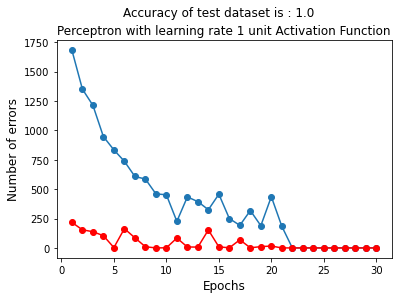

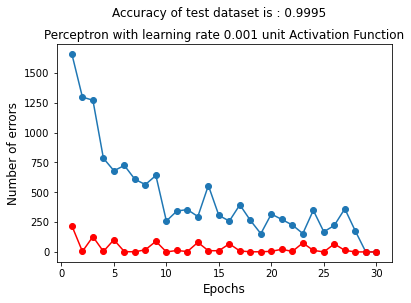

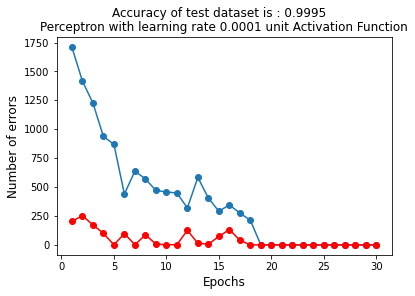

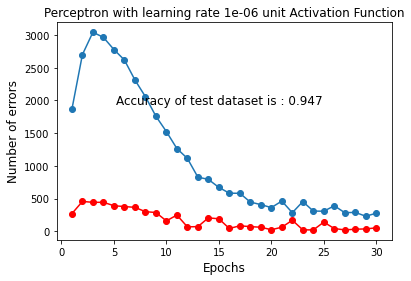

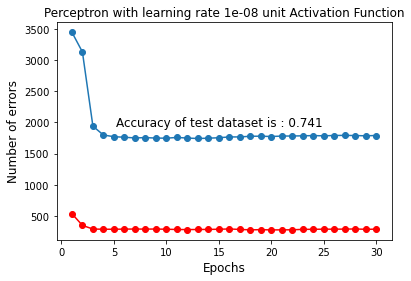

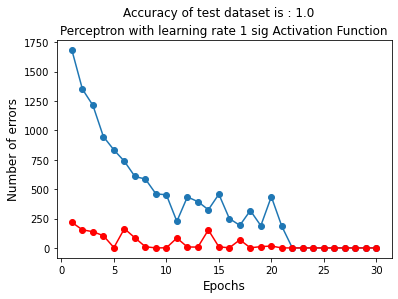

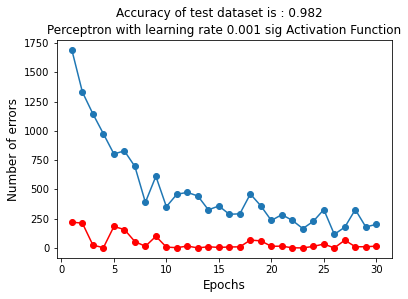

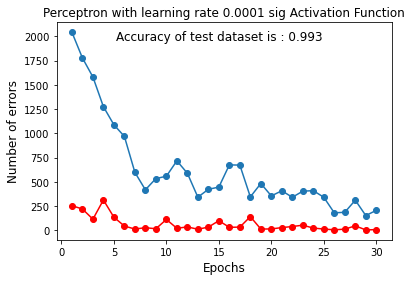

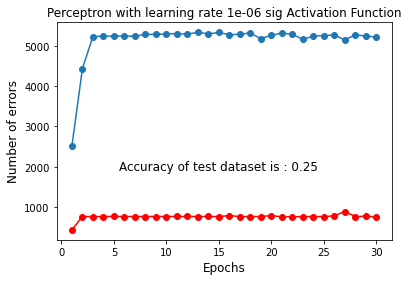

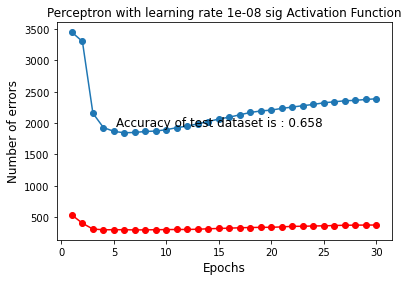

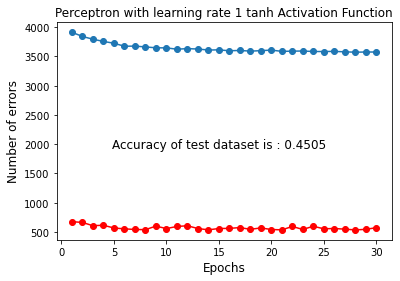

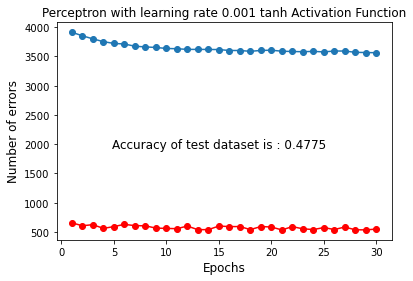

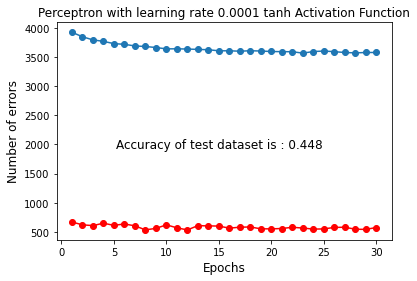

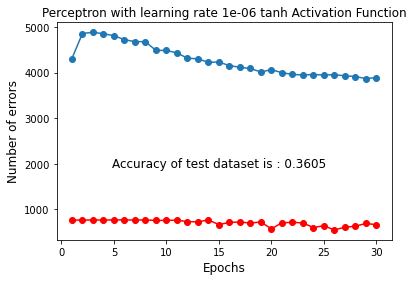

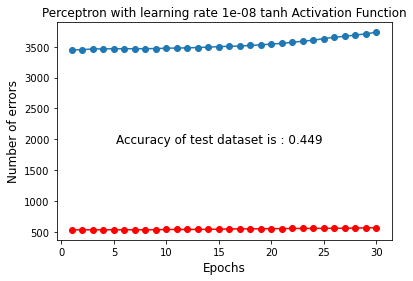

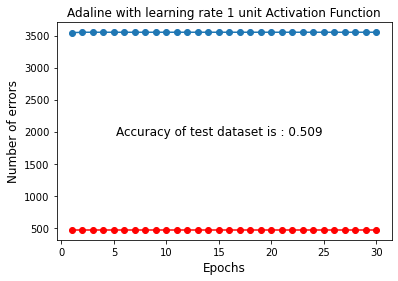

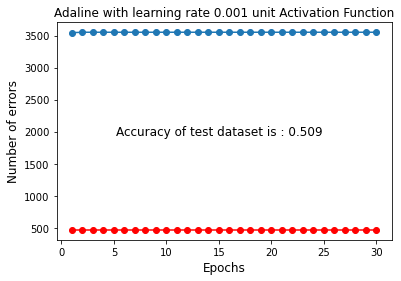

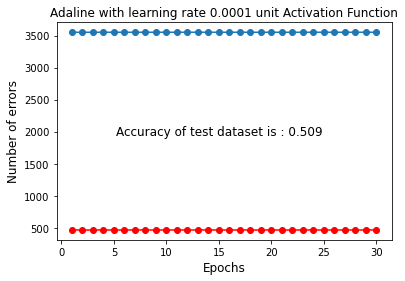

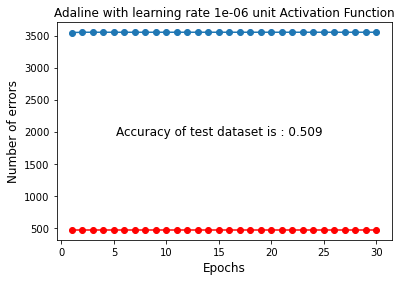

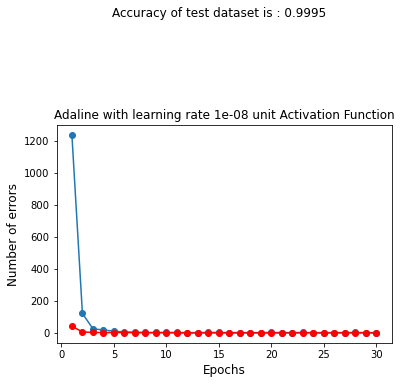

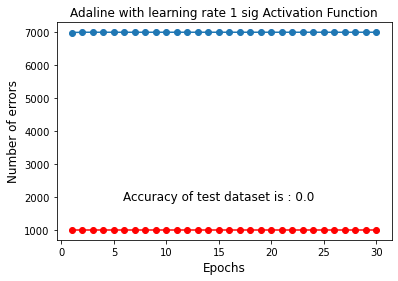

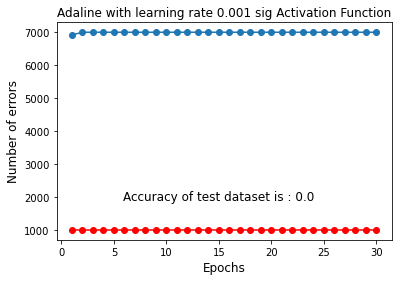

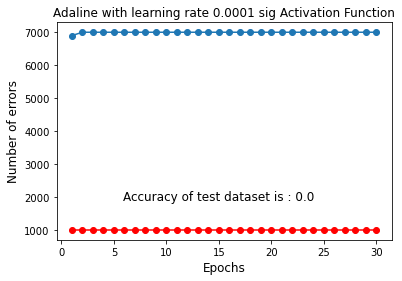

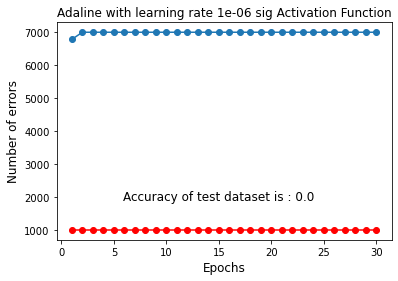

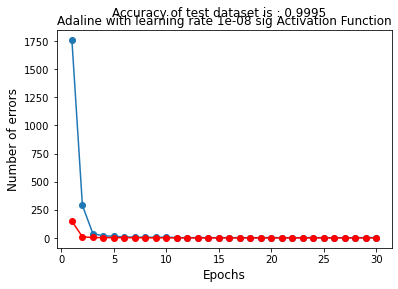

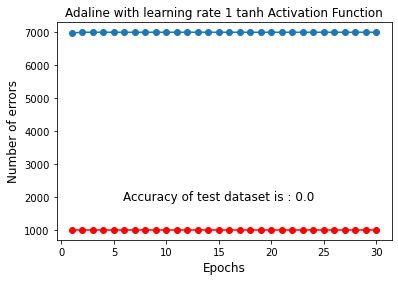

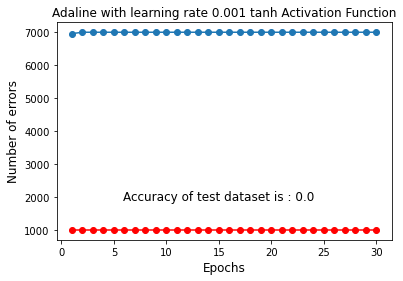

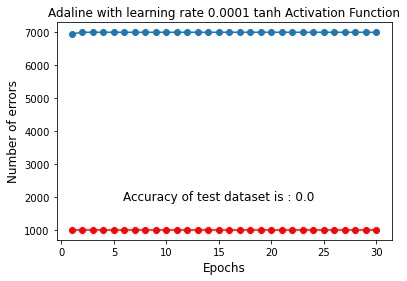

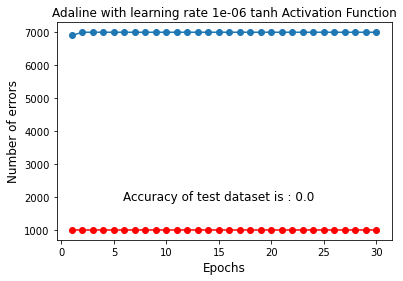

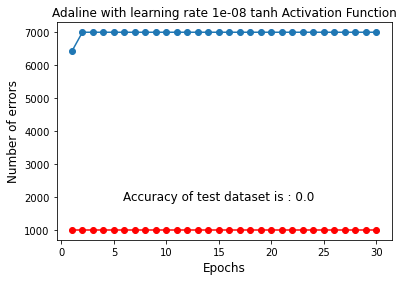

In [16]:
rates = [1 , 0.001 , 0.0001 , 0.000001 , 0.00000001]
acts = ["unit" , "sig" , "tanh"]
types = [Perceptron , Adaline]
for Type in types:
    for act in acts:
        for idx , rate in enumerate(rates):
            secondOrder(Type,rate , 30 , act , idx)